### K-Nearest Neighbor Algorithmus:

#### Parameter:

dataset = (X, Y)  
mit X := Features  
und Y := Classes

K := Hyperparameter für die nächsten k Nachbarn  
sample := Neuer Datenpunkt zum Klassifizieren

#### Pseudo-Code:

kNN (dataset, K, sample):

-   Bestimme von jedem Punkt $p \in dataset$ die Distanz, mit der geg. Distanzfunktion.
-   Bestimme die $K$ nächst gelegenen Nachbarn und bestimme die zugehörige Klasse von $sample$.


In [1]:
import numpy as np


np.random.seed(42)

In [2]:
def generate_dataset() -> tuple:
    num_samples_class1 = 10
    num_samples_class2 = 6
    num_samples_class3 = 13
    cov = np.array([[1, 0], [0, 1]])
    data1 = np.random.multivariate_normal(
        np.array([0, 0]),
        cov,
        num_samples_class1,
    )
    data2 = np.random.multivariate_normal(
        np.array([-10, 4]),
        cov,
        num_samples_class2,
    )
    data3 = np.random.multivariate_normal(
        np.array([10, 10]),
        cov,
        num_samples_class3,
    )
    data = np.concatenate((data1, data2, data3), axis=0)
    classes = np.array(
        [0 for i in range(num_samples_class1)]
        + [1 for i in range(num_samples_class2)]
        + [2 for i in range(num_samples_class3)],
    )
    return data, classes

In [3]:
x, y = generate_dataset()

In [4]:
print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

print(f"x:\n{x[:3]}")
print(f"y:\n{y[:3]}")

x shape: (29, 2)
y shape: (29,)
x:
[[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]
 [-0.23415337 -0.23413696]]
y:
[0 0 0]


In [5]:
import matplotlib.pyplot as plt


def plot_dataset(x: np.ndarray, y: np.ndarray) -> None:
    colors = ["red", "blue", "green"]
    for index, point in enumerate(x):
        plt.scatter(point[0], point[1], color=colors[y[index]])
    plt.show()

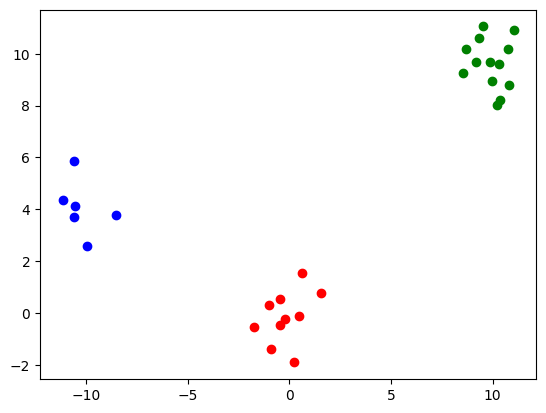

In [6]:
plot_dataset(x, y)

## KNN Implementation


In [ ]:
class KNeighborClassifier:
    def __init__(self, n_neighbors: int = 5) -> None:
        self.n_neighbors = n_neighbors
        self.X: np.ndarray
        self.y: np.ndarray
        self.num_classes: int

    def _distance(self, p1: np.ndarray, p2: np.ndarray):
        return np.linalg.norm(p1 - p2)

    def kneighbors(self, X: np.ndarray):
        distances = np.array(
            [[self._distance(sample, x_i) for x_i in self.X] for sample in X],
        )
        sorted_distances_idxs = np.argsort(distances[:])
        return sorted_distances_idxs[:, : self.n_neighbors]

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        self.X = X
        self.y = y
        self.num_classes = len(np.unique(self.y))

    def predict(self, X: np.ndarray):
        neighbors_idxs = self.kneighbors(X)  # noqa:F841
        return np.array([])

    def score(self, X: np.ndarray, y: np.ndarray) -> None:
        pass

In [ ]:
x_test = np.array([[0.0, 4.0], [-5.0, 4.0]])
y_test = np.array([0, 1])

clf = KNeighborClassifier(n_neighbors=3)
clf.fit(x, y)

y_pred = clf.predict(x_test)
score = clf.score(x_test, y_test)